In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Using the full path to the CSV file
df = pd.read_csv("C:/Users/kvini/PycharmProjects/JupyterProject/data/body_fat_percentage.csv")



df.head()

,Age,BMI,ExerciseHours,DietQuality,Gender,BodyFatPercentage
0,56,34.3,5.4,7,Female,54.57
1,69,30.7,9.2,4,Female,48.61
2,46,27.6,3.5,8,Male,37.00
3,32,28.6,3.5,7,Female,41.50
4,60,25.4,7.4,5,Female,42.22


In [3]:
df.info()

df=df.dropna()

df.isnull().sum()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                500 non-null    int64  
 1   BMI                500 non-null    float64
 2   ExerciseHours      500 non-null    float64
 3   DietQuality        500 non-null    int64  
 4   Gender             500 non-null    object 
 5   BodyFatPercentage  500 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 23.6+ KB


,Age,BMI,ExerciseHours,DietQuality,BodyFatPercentage
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,44.220000,26.757400,4.940800,5.384000,40.335940
std,15.036082,4.861794,2.960538,2.840542,9.165919
min,18.000000,18.600000,0.100000,1.000000,16.200000
25%,32.000000,22.500000,2.200000,3.000000,33.935000
50%,45.000000,26.800000,5.000000,5.000000,40.395000
75%,57.000000,31.000000,7.525000,8.000000,47.660000
max,69.000000,35.000000,10.000000,10.000000,66.080000


In [4]:

# Encode categorical 'Gender' column as numerical values
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Define input features (X) and target variable (y)
X = df.drop(columns=['BodyFatPercentage'])
y = df['BodyFatPercentage']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Ensure X and y are defined before this step
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Correcting the class name and variable names
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
from sklearn.linear_model import LinearRegression

# Train a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test data
y_pred = lin_reg.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f"Linear Regression Performance:\nMSE: {mse:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}")


Linear Regression Performance:
MSE: 3.0658, RMSE: 1.7510, R² Score: 0.9572


In [ ]:
# Scatter plot of actual vs predicted body fat percentage
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Body Fat Percentage")
plt.ylabel("Predicted Body Fat Percentage")
plt.title("Actual vs. Predicted Body Fat Percentage")
plt.show()


In [ ]:
from sklearn.linear_model import Ridge, Lasso

# Train Ridge Regression (L2 Regularization)
ridge = Ridge(alpha=1.0)  # You can experiment with different alpha values
ridge.fit(X_train, y_train)

# Train Lasso Regression (L1 Regularization)
lasso = Lasso(alpha=0.1)  # You can experiment with different alpha values
lasso.fit(X_train, y_train)

# Predict using Ridge and Lasso
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# Evaluate Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Evaluate Lasso Regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print evaluation results
print(f"\nRidge Regression Performance:\nMSE: {mse_ridge:.4f}, RMSE: {rmse_ridge:.4f}, R² Score: {r2_ridge:.4f}")
print(f"\nLasso Regression Performance:\nMSE: {mse_lasso:.4f}, RMSE: {rmse_lasso:.4f}, R² Score: {r2_lasso:.4f}")


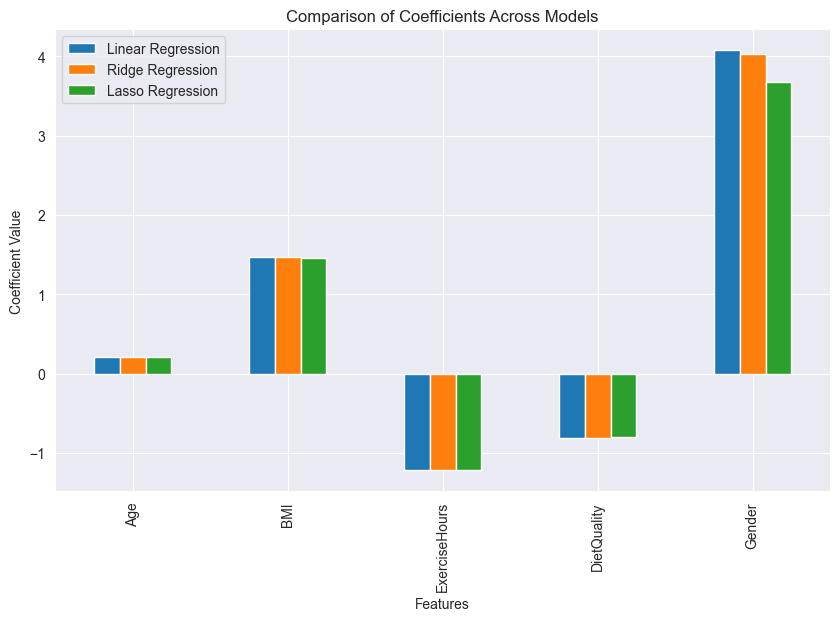

In [10]:
# Get coefficients from all models
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Linear Regression': lin_reg.coef_,
    'Ridge Regression': ridge.coef_,
    'Lasso Regression': lasso.coef_
})

# Plot coefficients
coefficients.set_index('Feature').plot(kind='bar', figsize=(10, 6))
plt.title("Comparison of Coefficients Across Models")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.legend()
plt.show()
